In [9]:
# import models and test data
from undershot_calcs import underTurbine
from river_class import river_obj
from breastshot_calcs import breastTurbine
import matplotlib.pyplot as plt
import pandas as pd


In [10]:
# import test data
data_df = pd.read_csv('Test Data/testData.csv')
data_df.head()


,Position,x centre [m],y centre [m],Output power [kW],Period for 10 rotation [s],Period for 1 rotation [s],Turbine rotational speed [rev/s],Turbine rotational speed [RPM],Generator rotational speed [RPM]
0,A,0.65,0.14,0.366,41.52,4.152,0.241,14.5,231.2
1,B,0.65,0.02,0.391,40.62,4.062,0.246,14.8,236.3
2,C,0.73,0.04,0.393,40.37,4.037,0.248,14.9,237.8
3,D,0.73,0.12,0.299,41.89,4.189,0.239,14.3,229.2
4,E,0.69,-0.10,0.471,38.46,3.846,0.260,15.6,249.6


In [11]:
'''
To validate the data i will first run the horizontal, 
vertical offset and turbine rot speed as inputs and compare for error on output power

Water height in channel = 0.3m
Channel width = 0.77m
Approx. 1.5 m/s

turbine dims:
radius = 0.585m
width = 1.008m
number of blades = 6

'''

# create river object
r_width = 0.77
r_depth = 0.3
r_velocity = 1.5

river = river_obj(r_width, r_depth, r_velocity)

# create a breastshot turbine object - with values from data sheet
b_radius = 0.585
b_width = 1.008
b_num_blades = 6
b_xcentre = 0.5
b_ycentre = 0.5

b_turbine = breastTurbine(b_radius, b_width, b_num_blades, b_xcentre, b_ycentre, river)

/Users/philblecher/Desktop/Github/DP4-code/breastshot_calcs.py:169: RuntimeWarning: invalid value encountered in scalar power
  flow_velocity = ((self.river.velocity)**2 + (self.g * fall_height * 2))**0.5


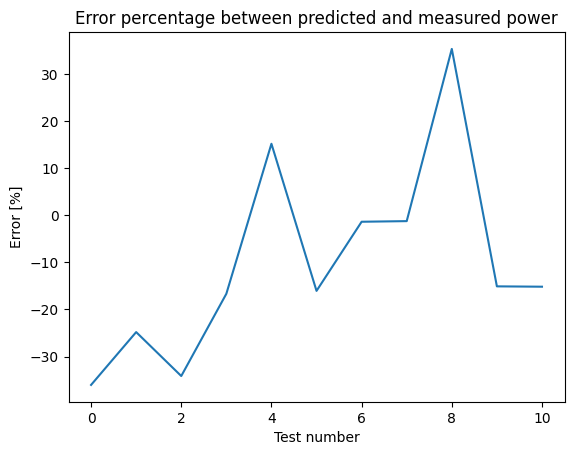

,Position,x centre [m],y centre [m],Output power [kW],Period for 10 rotation [s],Period for 1 rotation [s],Turbine rotational speed [rev/s],Turbine rotational speed [RPM],Generator rotational speed [RPM],predicted power [kW],error
0,A,0.65,0.14,0.366,41.52,4.152,0.241,14.5,231.2,0.234114,-36.034328
1,B,0.65,0.02,0.391,40.62,4.062,0.246,14.8,236.3,0.294001,-24.807822
2,C,0.73,0.04,0.393,40.37,4.037,0.248,14.9,237.8,0.258809,-34.145387
3,D,0.73,0.12,0.299,41.89,4.189,0.239,14.3,229.2,0.249175,-16.664000
4,E,0.69,-0.10,0.471,38.46,3.846,0.260,15.6,249.6,0.542642,15.210682
5,F,0.88,-0.13,0.505,37.15,3.715,0.269,16.2,258.4,0.423948,-16.049873
6,G,0.98,-0.45,0.638,34.54,3.454,0.290,17.4,277.9,0.629330,-1.358972
7,H,1.12,-0.50,0.768,28.60,2.860,0.350,21.0,335.7,0.758582,-1.226275
8,I,1.24,-0.54,0.772,28.71,2.871,0.348,20.9,334.4,1.045033,35.366970
9,J,0.89,-0.18,0.548,35.97,3.597,0.278,16.7,266.9,0.465316,-15.088388


In [15]:
'''
For each row in the test data, calculate the power output of the turbine with the given inputs
add that result to the column 'predicted power'

'''

# create empty list to store predicted power values
predicted_power = []

# iterate through each row in the test data
for index, row in data_df.iterrows():
    # calculate the power output of the turbine
    b_turbine.analysis(row['x centre [m]'], row['y centre [m]'], row['Turbine rotational speed [RPM]'])
    # append the power output to the list
    predicted_power.append(b_turbine.avg_power / 1000)

# add the predicted power to the test data
data_df['predicted power [kW]'] = predicted_power

# calculate the error percentage between the predicted power and the measured power
data_df['error'] = (data_df['predicted power [kW]'] - data_df['Output power [kW]']) / data_df['Output power [kW]'] * 100

# plot the error
plt.plot(data_df['error'])
plt.title('Error percentage between predicted and measured power')
plt.xlabel('Test number')
plt.ylabel('Error [%]')
plt.show()

# print the test data
data_df

To improve the model, the model will be fitted a little more to the model.

Idea:
Introduce weights to some of the internal calculations that are updated by a function of the error for each position.

Implementation:
Similar idea to the perceptron algorithm where weights are updated on each position and algorithm attempts to converge.

What variables?
